In [3]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

print(cv2.__version__)

4.5.5


**Load Images**

In [4]:
images_directory = "c:/Users/SR/Documents/GitHub/computer-vision/sample-images/"
filter_directory = "c:/Users/SR/Documents/GitHub/computer-vision/haarcascades/"

flower_image = cv2.imread(images_directory + 'flowers.jpeg')
flower_load_as_gray = cv2.imread(images_directory + 'flowers.jpeg', 0)
candy_image = cv2.imread(images_directory + 'candy.jpg')
license_plate = cv2.imread(images_directory + 'LP.jpg')
shapes_image = cv2.imread(images_directory + 'bunchofshapes.jpg')
house_image = cv2.imread(images_directory + 'house.jpg')
hand_image = cv2.imread(images_directory + 'hand.jpg')
soduku_image = cv2.imread(images_directory + 'soduku.jpg')
sunflower = cv2.imread(images_directory + 'Sunflowers.jpg')
sunflower_rgb = cv2.cvtColor(sunflower, cv2.COLOR_BGR2RGB)
blobs = cv2.imread(images_directory + 'blobs.jpg')
waldo = cv2.imread(images_directory + 'waldo.jpg')


in a python notebook, only the last block or line of code will be printed, if not used in a print statement.

**Defined Functions**

In [5]:
def rgb(image):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    return rgb_image

def show_multiple_images(images):

    # ideas for this function: 
    # - add title to each image 
    
    number_of_images = len(images)
    figure = plt.figure()
    i = 1
    for image in images:
        # if number_of_images < 3:
        fig = figure.add_subplot(number_of_images, 1, i)
        # else:
            # fig = figure.add_subplot(2, int(number_of_images/2)-1 , i)
        fig.imshow(image, cmap='gray')
        i += 1
    plt.show()


def show_rgb_channels(image):

    zeros = np.zeros(image.shape[0:2], dtype = "uint8")
    B, G, R = cv2.split(image)
    
    rgb_channels = plt.figure(figsize=(6, 4))

    r_channel = rgb_channels.add_subplot(1, 4, 1)
    r_channel.imshow(cv2.merge([R, zeros, zeros]))
    r_channel.set_title('Red')
    
    g_channel = rgb_channels.add_subplot(1, 4, 2)
    g_channel.imshow(cv2.merge([zeros, G, zeros]))
    g_channel.set_title('Green')
    
    b_channel = rgb_channels.add_subplot(1, 4, 3)
    b_channel.imshow(cv2.merge([zeros, zeros, B]))
    b_channel.set_title('Blue')

    all_channel = rgb_channels.add_subplot(1, 4, 4)
    all_channel.imshow(cv2.merge([R, G, B]))
    all_channel.set_title('RGB')

**importing images, gray scalling** 

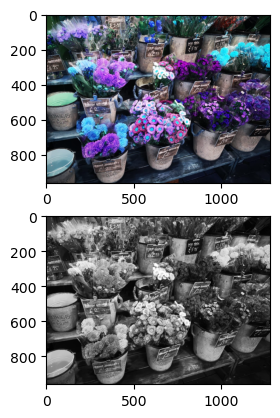

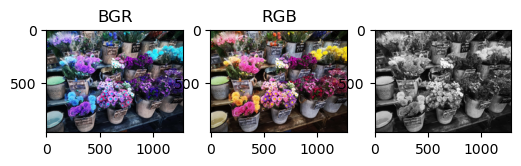

In [96]:

show_multiple_images([flower_image, flower_load_as_gray])

image_rgb = cv2.cvtColor(flower_image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(flower_image, cv2.COLOR_BGR2GRAY)

flower_fig = plt.figure(figsize=(6, 4))

fig_1 = flower_fig.add_subplot(1, 3, 1)
fig_1.imshow(flower_image)
fig_1.set_title('BGR')
fig_1.set_ylim()

fig_2 = flower_fig.add_subplot(1, 3, 2)
fig_2.imshow(image_rgb)
fig_2.set_title('RGB')

fig_3 = flower_fig.add_subplot(1, 3, 3)
fig_3.imshow(image_gray, cmap='gray')


In [5]:
cv2.imwrite('output.png', flower_image)
print(flower_image.shape)

(1280, 960, 3)


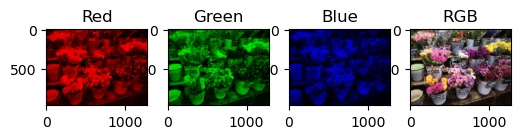

In [37]:
B, G, R = cv2.split(flower_image)

show_rgb_channels(flower_image)

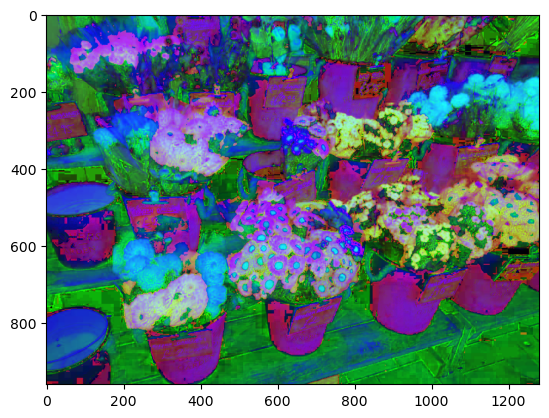

In [6]:
hsv_image = plt.imshow(cv2.cvtColor(flower_image, cv2.COLOR_BGR2HSV))

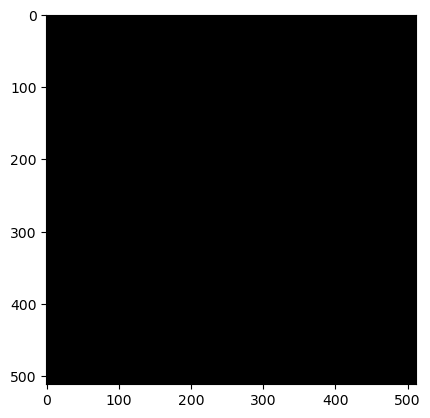

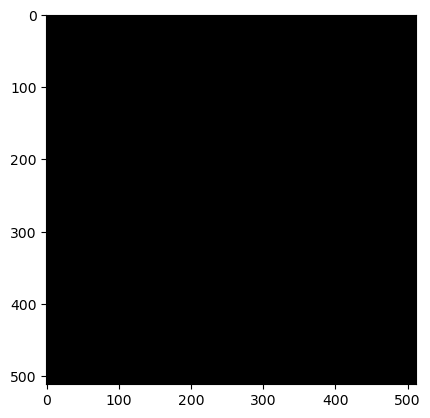

In [15]:
black_canvas = np.zeros((512, 512, 3), np.uint8)
gray_canvas = np.zeros((512, 512), np.uint8)

plt.imshow(gray_canvas, cmap='gray')
plt.show()
plt.imshow(black_canvas)
plt.show()


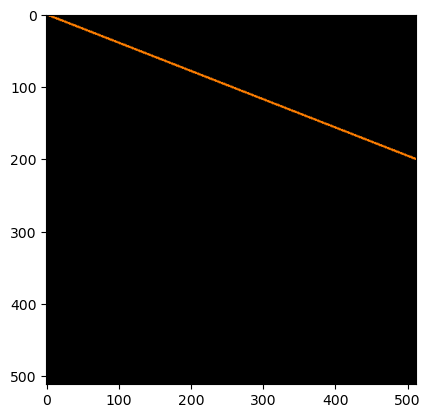

In [16]:
cv2.line(black_canvas, (0,0), (511, 200), (255,127,2), 2)
plt.imshow(black_canvas)

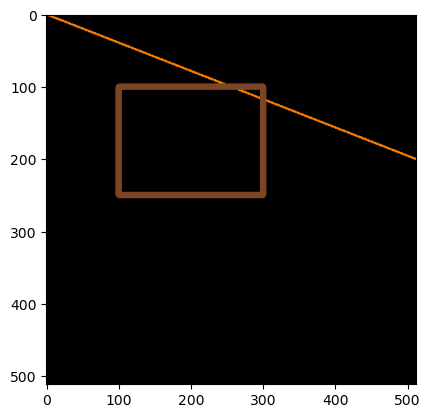

In [17]:
cv2.rectangle(black_canvas, (100,100), (300,250), (124,70,36), 8)
plt.imshow(black_canvas)

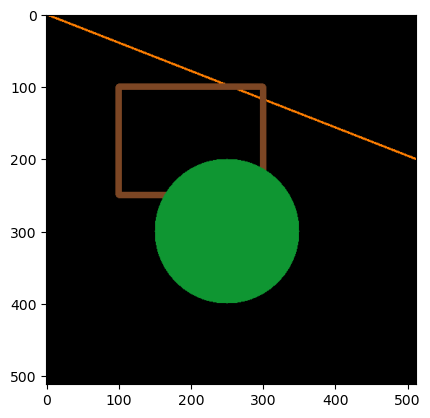

In [18]:
circle = cv2.circle(black_canvas, (250,300), 100, (15, 150, 50), -1)
plt.imshow(circle)

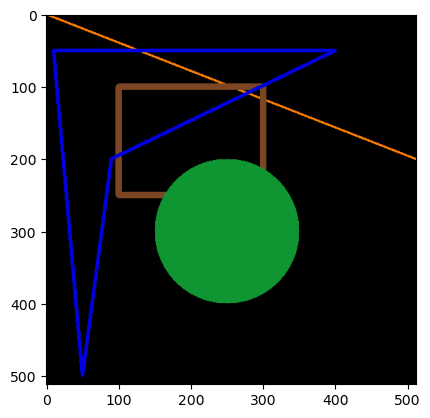

In [19]:
polygon = cv2.polylines(black_canvas, [np.array([[10, 50], [400, 50], [90, 200], [50, 500]], np.int32)],
                         True, (0, 0, 225), 3)
plt.imshow(polygon)

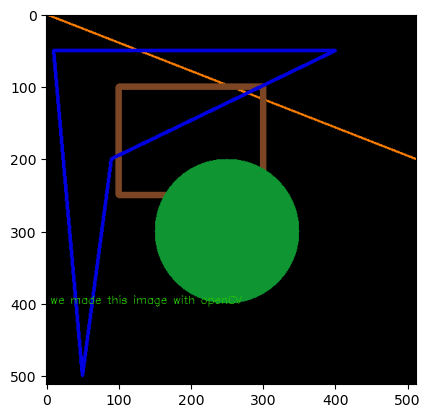

In [20]:
cv2.putText(black_canvas, 'we made this image with openCV', (5, 400), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (40, 200, 0), 1)

plt.imshow(black_canvas)

**Translation**

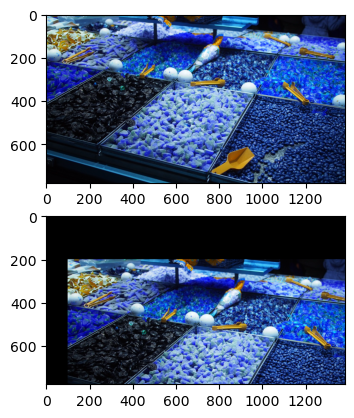

In [15]:
height, width = candy_image.shape[0:2]

translated_candy = cv2.warpAffine(candy_image, np.float32([[1, 0, 100], [0, 1, 200]]),
                                 (width, height))

show_multiple_images([candy_image, translated_candy])

**Rotation**

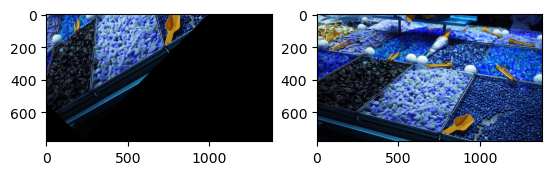

In [59]:
x_center = 100
y_center = 500
angle_rotation = 45
scale = 1

rotation_matrix = cv2.getRotationMatrix2D((x_center, y_center), angle_rotation, scale)
rotated_candy = cv2.warpAffine(candy_image, rotation_matrix, (width, height))

show_multiple_images([rotated_candy, candy_image])

**flipping**

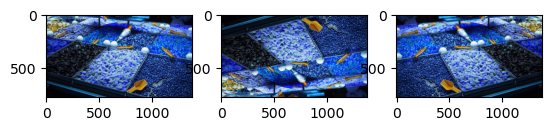

In [60]:
candy_flip_vertical = cv2.flip(candy_image, 0)
candy_flip_horizontal = cv2.flip(candy_image, 1)
show_multiple_images([candy_image, candy_flip_vertical, candy_flip_horizontal])

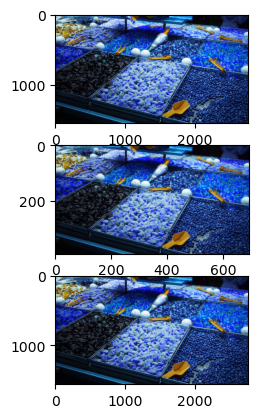

In [16]:
rescaled_candy = cv2.resize(candy_image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
candy_pyrup = cv2.pyrUp(candy_image)
candy_pyrdown = cv2.pyrDown(candy_image)

show_multiple_images([rescaled_candy, candy_pyrdown, candy_pyrup])


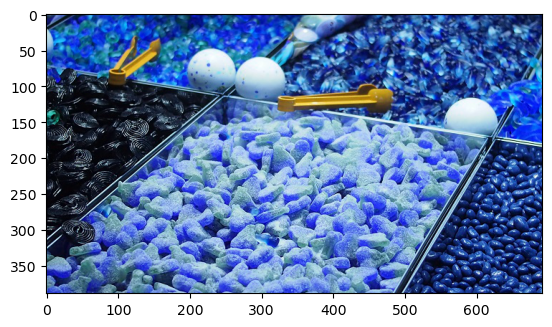

In [25]:

row, col = candy_image.shape[0:2]

crop_start = [int(row*0.25) ,  int(col*0.25)]
crop_end = [int(row*0.75) ,  int(col*0.75)]

cropped_image = candy_image[crop_start[0]: crop_end[0], crop_start[1]:crop_end[1]]
plt.imshow(cropped_image)


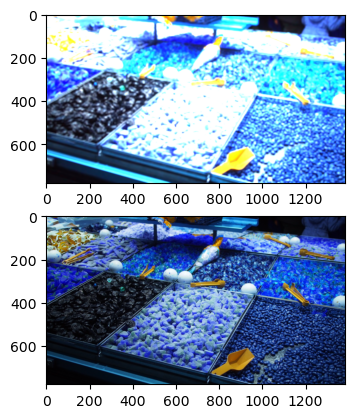

In [33]:
kernel = np.ones((10, 10), np.float32)/30

blurred_candy = cv2.filter2D(candy_image, -1, kernel)
gaussian_candy = cv2.GaussianBlur(candy_image, (3,3), 0)

show_multiple_images([blurred_candy, gaussian_candy])

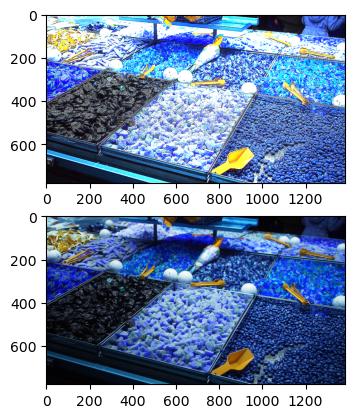

In [39]:
# Create our shapening kernel, remember it must sum to one 
sharp_kernel = np.array([[-2, -2, -2],
                          [-2, 19, -2],
                          [-2, -2, -2]])

sharp_candy = cv2.filter2D(candy_image, -1, sharp_kernel)
show_multiple_images([sharp_candy, candy_image])

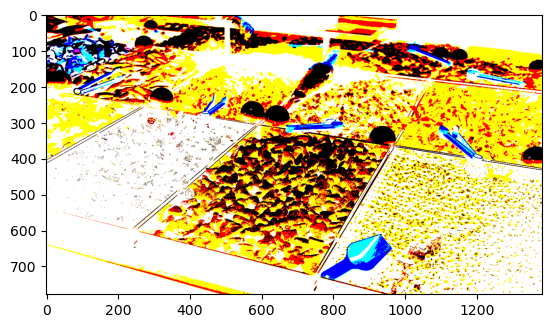

In [43]:
_, thresh_candy = cv2.threshold(candy_image, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_candy)

In [9]:
# thresh = cv2.adaptiveThreshold(candy_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
# plt.imshow(thresh)

**Edge ditection**

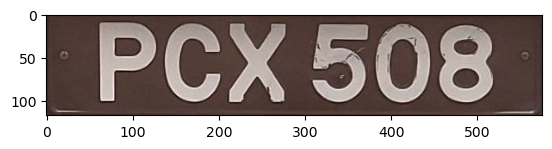

In [47]:
plt.imshow(license_plate)
# license_plate_copy = license_plate.copy()

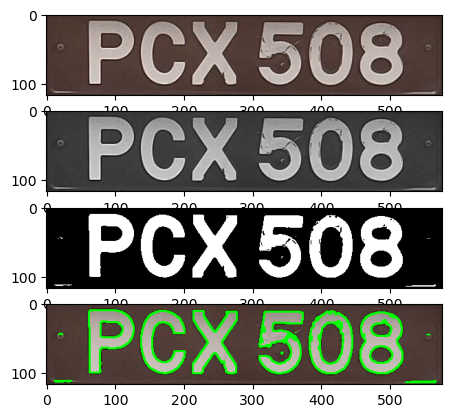

In [50]:
license_gray = cv2.cvtColor(license_plate.copy(), cv2.COLOR_BGR2GRAY)
_, license_th = cv2.threshold(license_gray.copy(), 0 , 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(license_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
licence_cont = cv2.drawContours(license_plate.copy(), contours, -1, (0, 255, 0), thickness =2)

show_multiple_images([license_plate,  license_gray, license_th,  licence_cont])
# plt.imshow(license_plate)

# show_multiple_images()

**Canny edge detection**

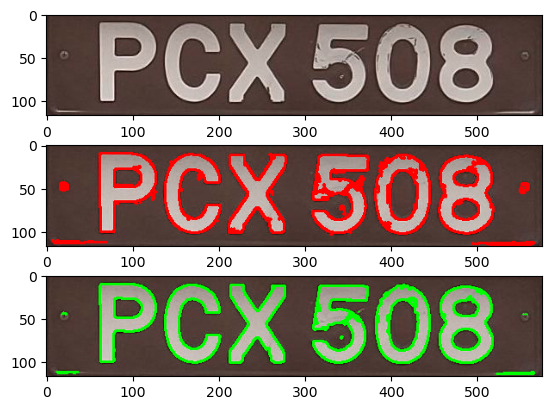

In [53]:
# plt.imshow(license_gray, cmap='gray')
licence_canny = cv2.Canny(license_gray.copy(), 30, 200)

contours, hierarchy = cv2.findContours(licence_canny.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

licence_canny_contour = cv2.drawContours(license_plate.copy(), contours, -1, (255, 0, 0), thickness=2)

show_multiple_images([license_plate, licence_canny_contour, licence_cont])

In [66]:
def cal_cont_area(contours):
    areas = []
    moments = []
    for cont in contours:
        area = cv2.contourArea(cont)
        areas.append(area)
        moments.append(cv2.moments(cont))
    return areas, moments

# def label_cont_center(image, contour)


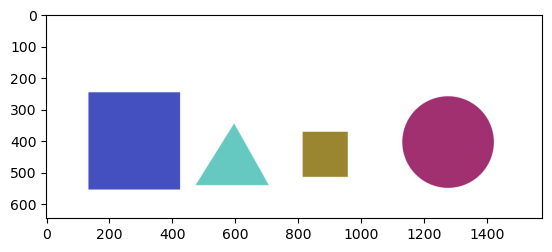

In [98]:
shapes_gray = cv2.cvtColor(shapes_image, cv2.COLOR_BGR2GRAY)
shapes_edge = cv2.Canny(shapes_gray, 50, 200)

shapes_contours, hierarchy = cv2.findContours(shapes_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

areas, moments = cal_cont_area(shapes_contours)
# print(areas)
# print(moments[0])
plt.imshow(shapes_image)
 

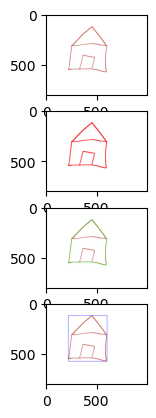

In [100]:
house_gray = cv2.cvtColor(house_image.copy(), cv2.COLOR_BGR2GRAY)
ret, house_thresh = cv2.threshold(house_gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(house_thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)  
house_contours = cv2.drawContours(house_image.copy(), contours,-1, (255, 0, 0), thickness=2 )

# print(contours)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    house_rect = cv2.rectangle(house_image.copy(), (x,y), (x+w, y+h), (0, 0, 255), 2)
    house_box = cv2.drawContours(house_image.copy(), [c], 0, (0, 255, 0), 2)


show_multiple_images([house_image, house_contours, house_box, house_rect])

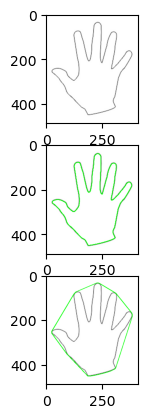

In [93]:


hand_gray = cv2.cvtColor(hand_image.copy(), cv2.COLOR_BGR2GRAY)
ret, hand_thresh = cv2.threshold(hand_gray, 176, 255, 0)

contours, hierarchy = cv2.findContours(hand_thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

hand_contours = cv2.drawContours(hand_image.copy(), contours, 0, (0, 255, 0), 2)

n = len(contours) -1 
contour = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

for c in contour:
    hull = cv2.convexHull(c)
    hand_convex = cv2.drawContours(hand_image.copy(), [hull], 0, (0, 255, 0), 2)

# plt.imshow(hand_image)
show_multiple_images([hand_image, hand_contours, hand_convex])

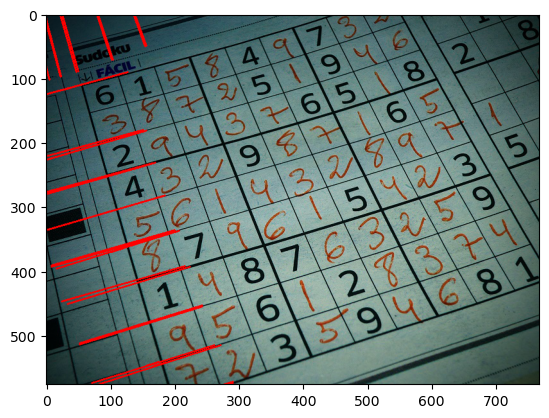

In [23]:
gray = cv2.cvtColor(soduku_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 240)
copy_image = soduku_image.copy()

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b* rho
    x1 = int(x0 + 100 * (-b))
    y1 = int(y0 + 100 * (a))
    x2 = int(x0 - 100 * (-b))
    y2 = int(y0 - 100 * (a))
    cv2.line(copy_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(copy_image)


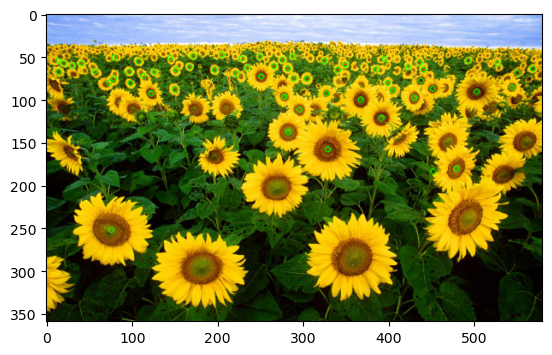

In [27]:


detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(sunflower_rgb)
blank = np.zeros((1,1))
sunflower_copy = sunflower_rgb.copy()

blobs = cv2.drawKeypoints(sunflower_copy, keypoints, blank, (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DEFAULT)
plt.imshow(blobs)

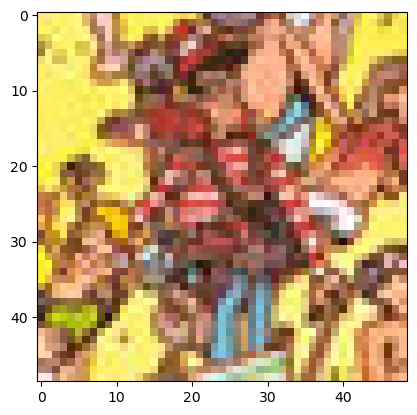

In [35]:
plt.imshow(rgb(waldo))

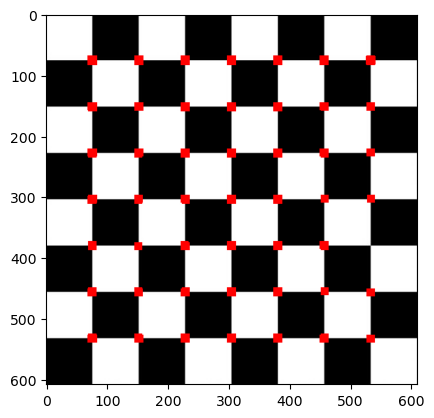

In [56]:
chess = cv2.imread(images_directory + 'chess.jpg')
chess_gray = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
chess_gray = np.float32(chess_gray)

harris_corners = cv2.cornerHarris(chess_gray, 3, 3, 0.05)

kernel = np.ones((7,7), np.uint8)
harris_corners =  cv2.dilate(harris_corners, kernel, iterations=2)

chess[harris_corners > 0.5*harris_corners.max()] = [255, 0, 0]

plt.imshow(chess)

[[ 53  70 215 215]]


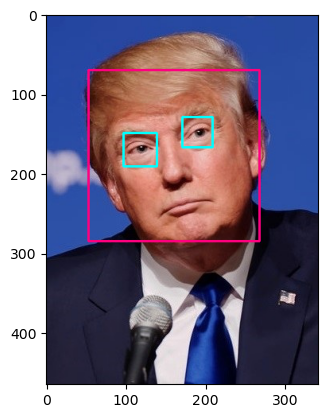

In [27]:

face_classifier = cv2.CascadeClassifier(filter_directory + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(filter_directory + 'haarcascade_eye.xml')

face_image = cv2.imread(images_directory+'Trump.jpg')

face_gray = cv2.cvtColor(face_image,cv2.COLOR_BGR2GRAY)

face_detect = face_classifier.detectMultiScale(face_gray, scaleFactor=1.3, minNeighbors=5)



# eye1_detect = eye_classifier.detectMultiScale(face_gray, 1.2, 3)
# eye2_detect = eye_classifier.detectMultiScale(face_gray, 1.2, 3)

# print(eye1_detect)


print(face_detect)
face_copy = face_image.copy()
for (x, y, w, h) in face_detect:
    cv2.rectangle(face_copy, (x, y), (x+w, y+h), (127, 0, 255), 2)
    eye_gray = face_gray[y:y+h, x:x+w]
    eye_detect = eye_classifier.detectMultiScale(eye_gray, 1.2, 3)
    for (ex, ey, ew, eh) in eye_detect:
        cv2.rectangle(face_copy[y:y+h, x:x+w], (ex, ey), (ex+ew, ey+eh), (255, 255, 0), 2)

plt.imshow(rgb(face_copy))





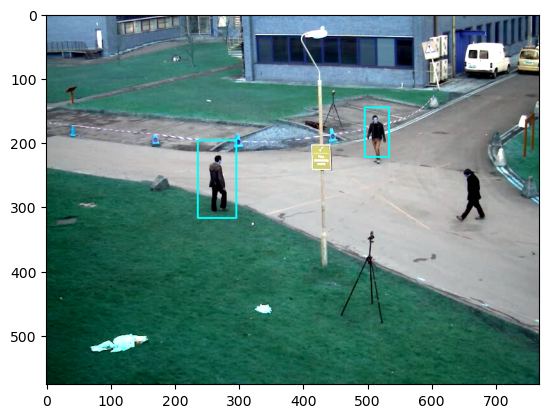

In [51]:
walking_video = cv2.VideoCapture(images_directory + 'walking.avi')
pedes_class = cv2.CascadeClassifier(filter_directory + 'haarcascade_fullbody.xml')

ret, frame = walking_video.read()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
bodies = pedes_class.detectMultiScale(gray, 1.2, 3)

for (x, y, w, h) in bodies:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 255), 2)

walking_video.release()
plt.imshow(frame)

In [58]:
!ffmpeg -i walking.avi walking.mp4 -y

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

In [64]:
walking_video = cv2.VideoCapture('walking.mp4')
w = int(walking_video.get(3))
h = int(walking_video.get(4))

out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (w, h))

pedes_class = cv2.CascadeClassifier(filter_directory + 'haarcascade_fullbody.xml')

while True:
    ret, frame = walking_video.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        bodies = pedes_class.detectMultiScale(gray, 1.2, 3)
        for (x, y, w, h) in bodies:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 255), 2)
        out.write()
    else:
        break


walking_video.release()
out.release()

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'write'
> Overload resolution failed:
>  - VideoWriter.write() missing required argument 'image' (pos 1)
>  - VideoWriter.write() missing required argument 'image' (pos 1)


In [60]:
!ffmpeg -i walking_output.avi walking_output.mp4 -y

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

In [53]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('walking_video_1.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode() 

In [54]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)